In [1]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine-quality-white-and-red.csv')

In [3]:
df_whites = df[df['type'] == "white"]
df_whites = df_whites.drop('type', axis=1)

quality = df_whites['quality']
df_whites = df_whites.drop('quality', axis=1)

In [4]:
# 60-20-20 training-validation-test split
X_train, X_test, y_train, y_test = train_test_split(df_whites, quality, test_size=0.20, random_state=60)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=60)

In [5]:
# Normalizing data between 0-1
X_train_scaled = X_train / X_train.max()
X_test_scaled = X_test / X_test.max()
X_val_scaled = X_val / X_val.max()

In [6]:
# # From paper results
# training_error = 0.234133 
# testing_error = 0.241568 
# validation_error = 0.243491
# # Finding closest iterative and solver to mimic paper results
# for i in range(100, 2000, 100):
#     regr = MLPRegressor(hidden_layer_sizes=(5), max_iter=i, solver="adam").fit(X_train_scaled, y_train)
#     test_e = regr.score(X_test_scaled, y_test)
#     train_e = regr.score(X_train_scaled, y_train)
#     val_e = regr.score(X_val_scaled, y_val)
#     print(i)
#     print(train_e, test_e, val_e)
# for i in range(100, 2000, 100):
#     regr = MLPRegressor(hidden_layer_sizes=(5), max_iter=i, solver="sgd").fit(X_train_scaled, y_train)
#     test_e = regr.score(X_test_scaled, y_test)
#     train_e = regr.score(X_train_scaled, y_train)
#     val_e = regr.score(X_val_scaled, y_val)
#     print(i)
#     print(train_e, test_e, val_e)

In [7]:
# From above experiment, seems 1500 
# iterations with "Adam" solver gets fairly close to paper results consistentl
# 

In [8]:
test_scores = {}

In [9]:
# Testing different hidden layer sizes
for i in range(0, 100):
    print(i)
    for j in range (5, 12):
        regr = MLPRegressor(hidden_layer_sizes=(j), max_iter=1500, solver="adam").fit(X_train_scaled, y_train)
        test_e = regr.score(X_test_scaled, y_test)
        # Stop any outliers from being added to map (errors of less than 0.025) as that means model is 
        # hyper over-fitted or an error occured during training       
        if(test_e > 0.025):
            if(not j in test_scores):
                test_scores[j] = []
            test_scores[j].append(test_e)
print(test_scores)
avg_test = []
for index in test_scores.keys():
    print(index)
    avg_test.append(sum(test_scores[index]) / len(test_scores[index]))
print(avg_test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
{5: [0.23574898716868775, 0.23530940541162348, 0.23642158236629562, 0.2517884895049666, 0.21072883552595634, 0.25104255216663707, 0.25301368471885677, 0.24582967614140128, 0.22803118436253556, 0.2513545721603958, 0.22254655467715323, 0.2355975057194103, 0.2226724774945099, 0.24849812494034085, 0.21751240468854638, 0.24514524857171605, 0.2379199686615544, 0.23510321719501837, 0.22410800178039714, 0.2506791874942059, 0.2528224056173176, 0.21700466910568983, 0.2186519818902669, 0.2406158189391313, 0.2321885356423472, 0.24060144552135165, 0.24715998757832058, 0.24859544930900357, 0.20698871017407205, 0.2242140556121458], 6: [0.22624379525159632, 0.22646522471714214, 0.21289495789603807, 0.23975220187588164, 0.23188757794219383, 0.2515369383402931, 0.22353259050193375, 0.22194040201800092, 0.23140220679428092, 0.21591206456932222, 0.2422420380351864, 0.23540794573659207, 0.2221349445097257, 0.24335715302712835, 

In [14]:
df_map = {"Test Error": avg_test}

In [15]:
df = pd.DataFrame.from_dict(df_map)
# Fixing index to start at 5
df.index +=5 

In [19]:
print(df)

    Test Error
5     0.235596
6     0.232248
7     0.232924
8     0.234364
9     0.227608
10    0.233325
11    0.233930
Test Error    0.235596
Name: 5, dtype: float64


Text(0.5, 0, 'Number of neurons in hidden layer')

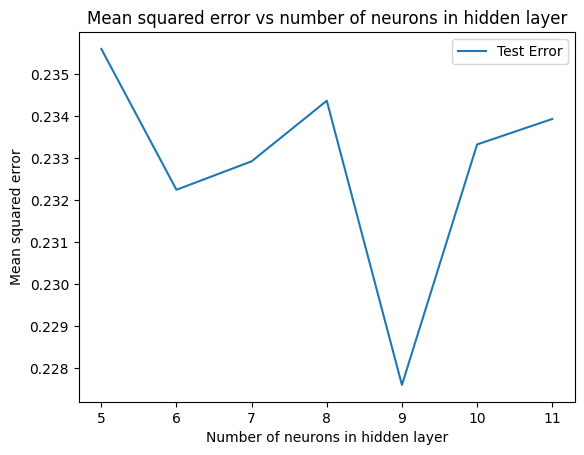

In [17]:
line = df.plot(kind="line", title="Mean squared error vs number of neurons in hidden layer")
line.set_ylabel("Mean squared error")
line.set_xlabel("Number of neurons in hidden layer")